In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
%matplotlib inline

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [4]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


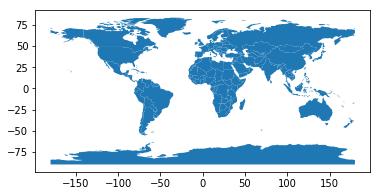

In [6]:
world.plot();

In [66]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

In [7]:
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

In [8]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,gdp_per_cap
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",0.000784
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,0.008618
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",0.005993
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",0.038408
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,0.014027


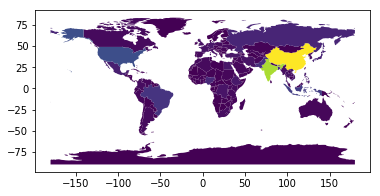

In [11]:
world.plot(column='pop_est');

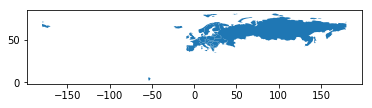

In [10]:
europe = world[world.continent=="Europe"]
europe.plot();

## List of countries in EU

In [71]:
eu_countries = (
    'Austria',
    'Belgium',
    'Bulgaria',
    'Croatia',
    'Cyprus',
    'Czech Rep.',
    'Denmark',
    'Estonia',
    'Finland',
    'France',
    'Germany',
    'Greece',
    'Hungary',
    'Ireland',
    'Italy',
    'Latvia',
    'Lithuania',
    'Luxembourg',
    'Malta',
    'Netherlands',
    'Poland',
    'Portugal',
    'Romania',
    'Slovakia',
    'Slovenia',
    'Spain',
    'Sweden',
    'United Kingdom'
)

In [72]:
eu = world[world.name.isin(eu_countries)]

EU consists of 28 countries.
Malta is not included in GeoPandas ??? Included in Italy ???

In [87]:
print('{} countries found'.format(len(eu)))
missing = [country for country in eu_countries if country not in eu.name.values]
print('Missing: {}'.format(', '.join(missing)))

27 countries found
Missing: Malta


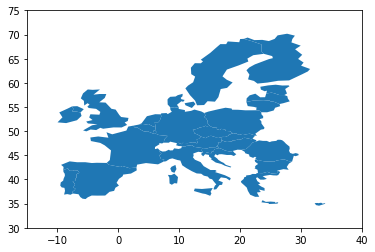

In [100]:
f,ax = plt.subplots()
ax.set_xlim(-15,40)
ax.set_ylim(30,75)
eu.plot(ax=ax);